### **Table of Contents**

- [Introduction](#Introduction)
- [Data Description](#Data-Description)
- [Data Loading](#Data-Loading)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Model Training](#Model-Training)
- [Results](#Results)

### Introduction

**About the virus**

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.

As of 25 January 2023 the South African Covid Statistics were as follow:

- **Vaccines Administered** :21 454 339
- **Positive Cases Identified** :4 054 206
- **Recoveries** : 3 944 987
- **Deaths** : 102 595

**Source**:[Covid](https://www.health.gov.za/covid19/)

#### Data Description


**About Data**
- Daily COVID-19 case data from January 22, 2020 to July 24, 2020 obtained from the Johns Hopkins Coronavirus Resource Center.
- Source Code: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

#### Data Loading

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

**Data Overview**

In [2]:
raw_data= pd.read_csv("confirmed_global(1).xls")
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331


In [3]:
#showing all columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,300,338,368,424,445,485,532,556,608,666,715,785,841,907,934,997,1027,1093,1177,1236,1331,1464,1532,1704,1830,1940,2127,2291,2470,2705,2895,3225,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054,6403,6665,7073,7654,8146,8677,9219,

- The data contains daily covid confirmed cases globally
- The lattitude and longitude of each country along with the country names
- It also includes state information with some missing

In [4]:
#size of the data
raw_data.shape

(274, 449)

In [5]:
#statistical overview of data
raw_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.0

- The current statistical summary is too broad hence further analysis will be done when the data has been cleaned and modified

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


- Not much can be extracted from the above data information

#### Data Exploration and Analysis

In [6]:
#make copy of the original data to avoid modifying it directly
time_series_data = raw_data.copy()

In [7]:
#dropping unnecessary columns
time_series_data= time_series_data.drop(columns=['Province/State', 'Lat', 'Long'], axis=1)

In [8]:
#reshaping the data for time series analysis
time_series_data = time_series_data.melt(
    id_vars=['Country/Region'],
    var_name='Date',
    value_name='Confirmed_Cases'
)

time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)


C:\Users\pales\AppData\Local\Temp\ipykernel_31372\3145658462.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])


In [10]:
#sorting the data by date
time_series_data.sort_index()

,Country/Region,Confirmed_Cases
Date,,
2020-01-22,Afghanistan,0
2020-01-22,Albania,0
2020-01-22,Algeria,0
2020-01-22,Andorra,0
2020-01-22,Angola,0
...,...,...
2021-04-10,Vietnam,2692
2021-04-10,West Bank and Gaza,265897
2021-04-10,Yemen,5276


In [15]:
time_series_data.head(10)

,Country/Region,Confirmed_Cases
Date,,
2020-01-22,Afghanistan,0
2020-01-22,Albania,0
2020-01-22,Algeria,0
2020-01-22,Andorra,0
2020-01-22,Angola,0
2020-01-22,Antigua and Barbuda,0
2020-01-22,Argentina,0
2020-01-22,Armenia,0
2020-01-22,Australia,0


In [16]:
#size of the converted time series data
time_series_data.shape

(121930, 2)

- The size of our data has increase as all the date have been change to an index 

In [17]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121930 entries, 2020-01-22 to 2021-04-10
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Country/Region   121930 non-null  object
 1   Confirmed_Cases  121930 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


- Our data has 2 columns which include the name of the Country followed by a column which has the total number of daily records for covid

In [20]:
#statistical summary of the dataset
time_series_data['Confirmed_Cases'].describe().apply(lambda x: f"{x:,.0f}")

count       121,930
mean        153,255
std       1,074,238
min               0
25%              72
50%           1,111
75%          20,345
max      31,151,495
Name: Confirmed_Cases, dtype: object

- The global daily average of confirmed cases is 153,255, with a standard deviation of 1,074,238. The highest number of cases recorded in a single day is 31,151,495.
- The large standard deviation suggests that the data may be highly skewed, with a few extreme values pulling the average upward.

In [21]:
#checking for duplicates
time_series_data.duplicated().sum()

55869

In [22]:
#since there are duplicates, we can check which rows are duplicated
time_series_data[time_series_data.duplicated()]

,Country/Region,Confirmed_Cases
Date,,
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
2020-01-22,Australia,0
...,...,...
2021-04-10,United Kingdom,4277
2021-04-10,United Kingdom,1574
2021-04-10,United Kingdom,20


In [23]:
#the number of duplicated values is huge hence we are not going to drop them but rather sum them up for each country 
time_series_data = time_series_data.groupby(['Country/Region', 'Date']).sum().reset_index()


In [24]:
time_series_data.duplicated().sum()

0

In [25]:
#checking for missing values
time_series_data.isnull().sum()

Country/Region     0
Date               0
Confirmed_Cases    0
dtype: int64

In [74]:
time_series_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Since our country of interest is South African we will be narrowing the dataset to only it

In [94]:
#zooming into South Africa
south_africa_data = time_series_data[time_series_data['Country/Region'] == 'South Africa']

In [95]:
#overview of data
south_africa_data.head()

,Country/Region,Date,Confirmed_Cases
71200,South Africa,2020-01-22,0
71201,South Africa,2020-01-23,0
71202,South Africa,2020-01-24,0
71203,South Africa,2020-01-25,0
71204,South Africa,2020-01-26,0


In [96]:
#removing the  country column as it is no longer needed
south_african_data=south_africa_data.drop(columns=['Country/Region'], inplace=True)

C:\Users\pales\AppData\Local\Temp\ipykernel_31372\2829059421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_african_data=south_africa_data.drop(columns=['Country/Region'], inplace=True)


In [97]:
#set the index to Date
south_africa_data.set_index('Date', inplace=True)

In [99]:
south_africa_data.head()

,Confirmed_Cases
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [36]:
south_africa_data.shape

(445, 1)

- 445 daily covid cases were recorded

In [100]:
south_africa_data['Confirmed_Cases'].describe().apply(lambda x: f"{x:,.0f}")

count          445
mean       601,689
std        551,638
min              0
25%         11,350
50%        627,041
75%        921,922
max      1,557,527
Name: Confirmed_Cases, dtype: object

- In comparison with the global statistics, South Africa recorded an average of 601,689 daily confirmed cases, nearly four times the global average
- This difference may be influenced by factors such as population distribution and the capacity of the healthcare system, particularly in rural areas where access to information and reporting infrastructure may be limited

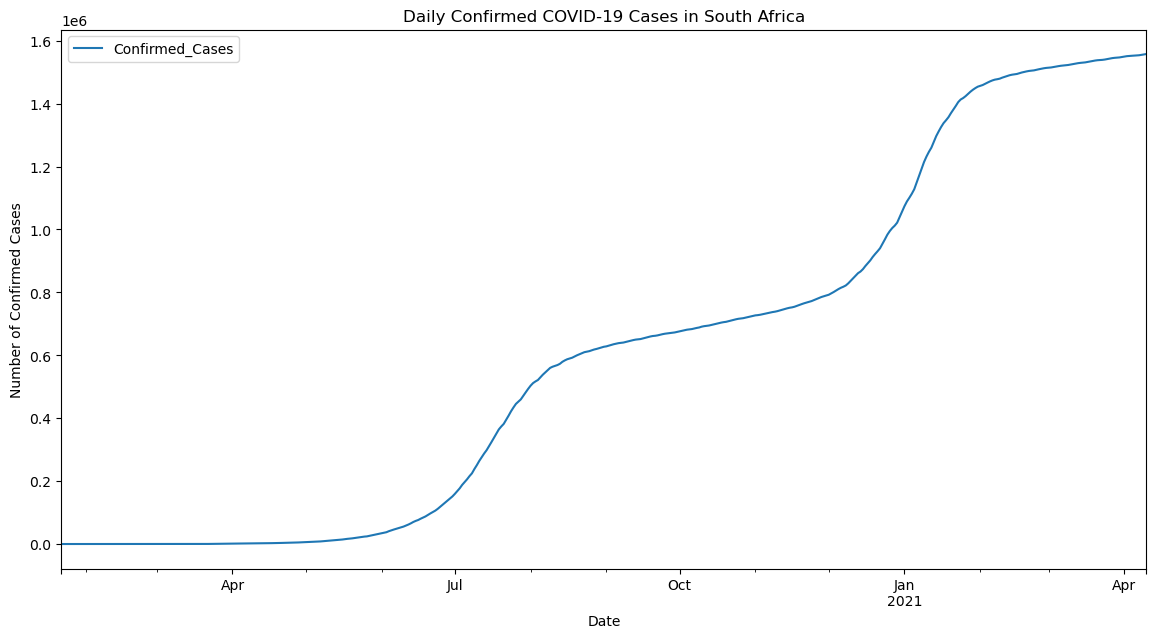

In [101]:
south_africa_data.plot(figsize=(14, 7))
plt.title('Daily Confirmed COVID-19 Cases in South Africa')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.show()

- The number of cases been on an increase since the beginning of the pandemic going to April of 2021 without a decrease in the number cases

**Decomposition**

Given that July occurs during the winter season, we will analyze the different components of the time series (trend, seasonality, and residuals). This period is of particular interest, as colder weather is often associated with an increase in flu-like symptoms, which may influence the observed patterns in the data.

In [128]:
#july 2020 data
south_africa_data_july = south_africa_data.loc['2020-07-01':'2020-07-31']

In [129]:
south_africa_data_july.head()

,Confirmed_Cases
Date,
2020-07-01,159333
2020-07-02,168061
2020-07-03,177124
2020-07-04,187977
2020-07-05,196750


In [130]:
decomposition = seasonal_decompose(south_africa_data_july ['Confirmed_Cases'], model='additive')

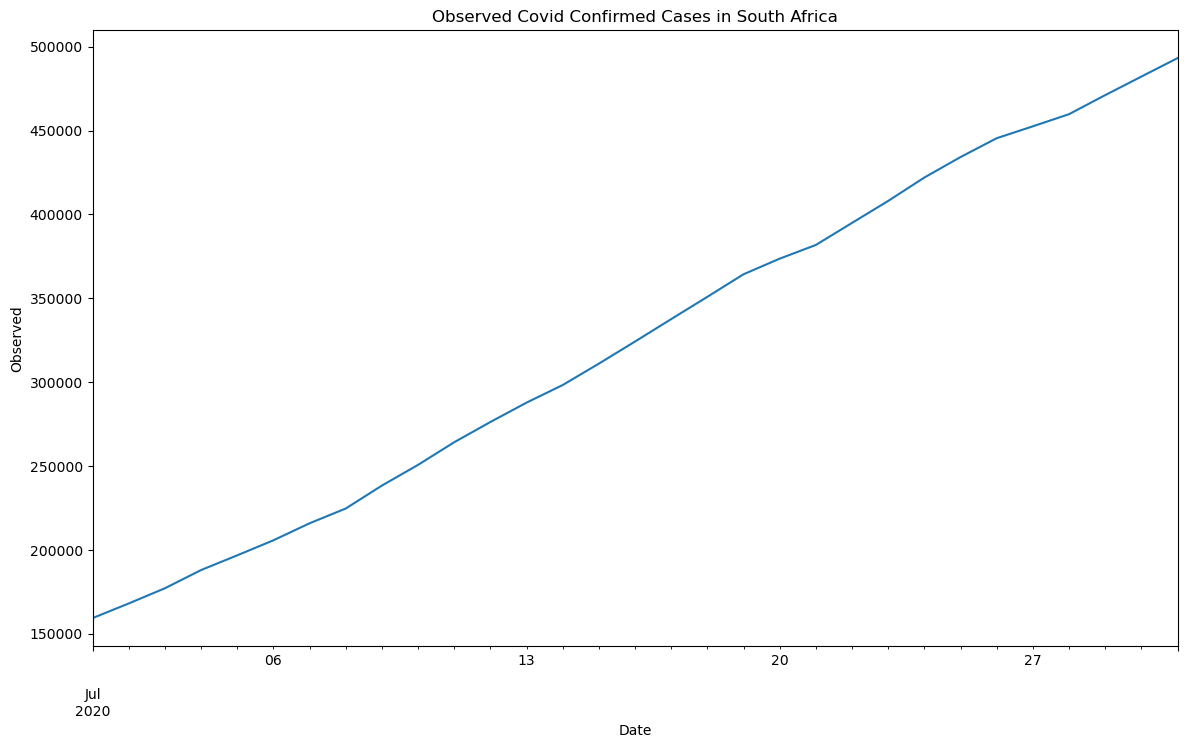

In [131]:
decomposition.observed.plot(title="Observed Covid Confirmed Cases in South Africa", figsize=(14, 8))
plt.ylabel("Observed")
plt.show()

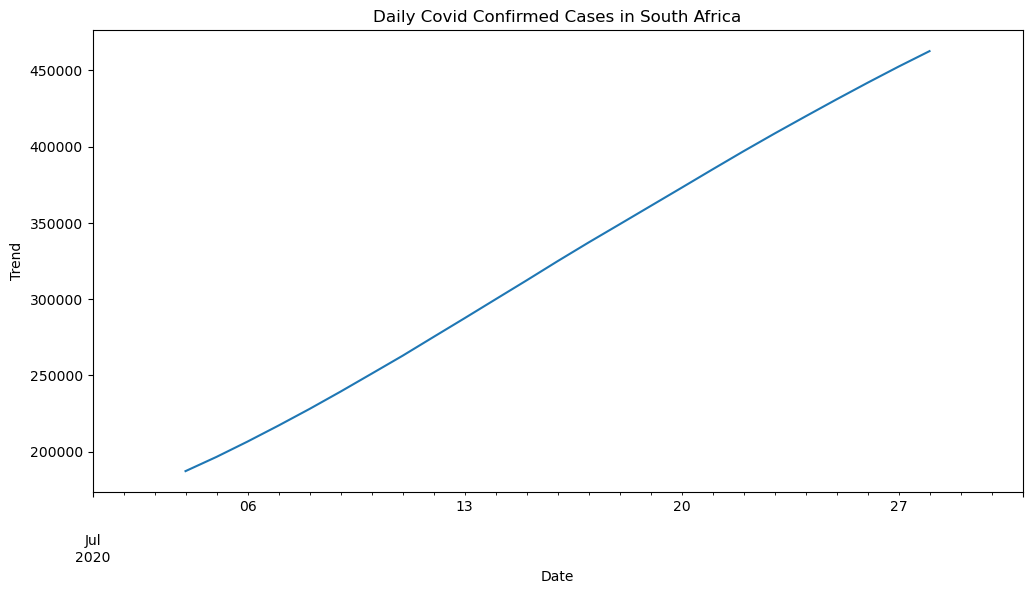

In [104]:
decomposition.trend.plot(title="Daily Covid Confirmed Cases in South Africa",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

- Based on the trend ,the number of cases confirmed has a linear increase 

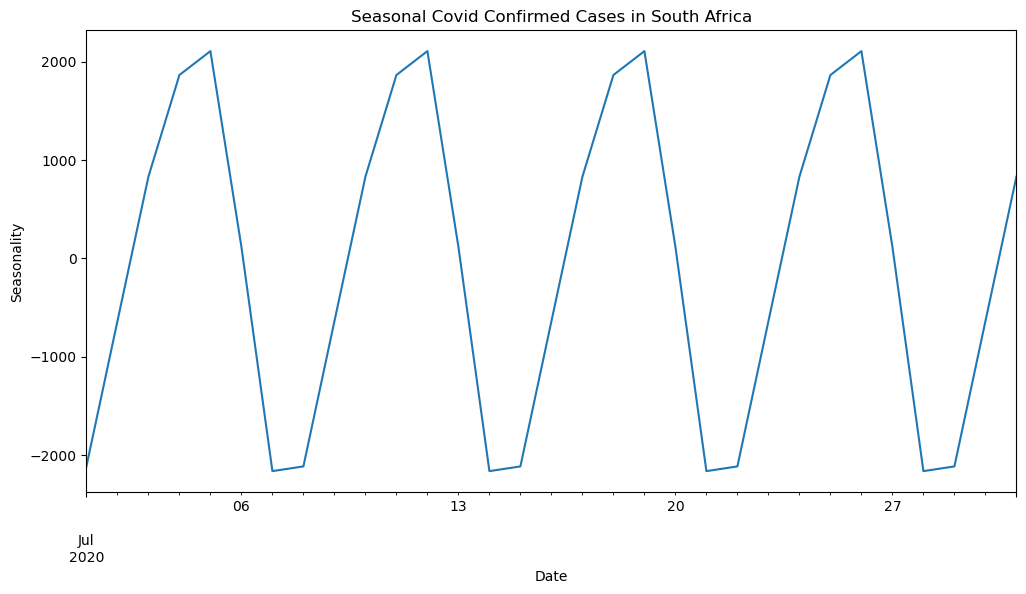

In [105]:
decomposition.seasonal.plot(title="Seasonal Covid Confirmed Cases in South Africa", figsize=(12, 6))
plt.ylabel("Seasonality")
plt.show()

-  Based on this, we observe a consistent drop in the number of confirmed cases from Tuesday to Wednesday
-  In contrast, there is a significant increase in confirmed cases from Sunday to Monday. This may be influenced by the fact that Sunday is typically a non-working day, during which many people attend church services or gather with family—settings that involve large crowds and may increase the risk of infection

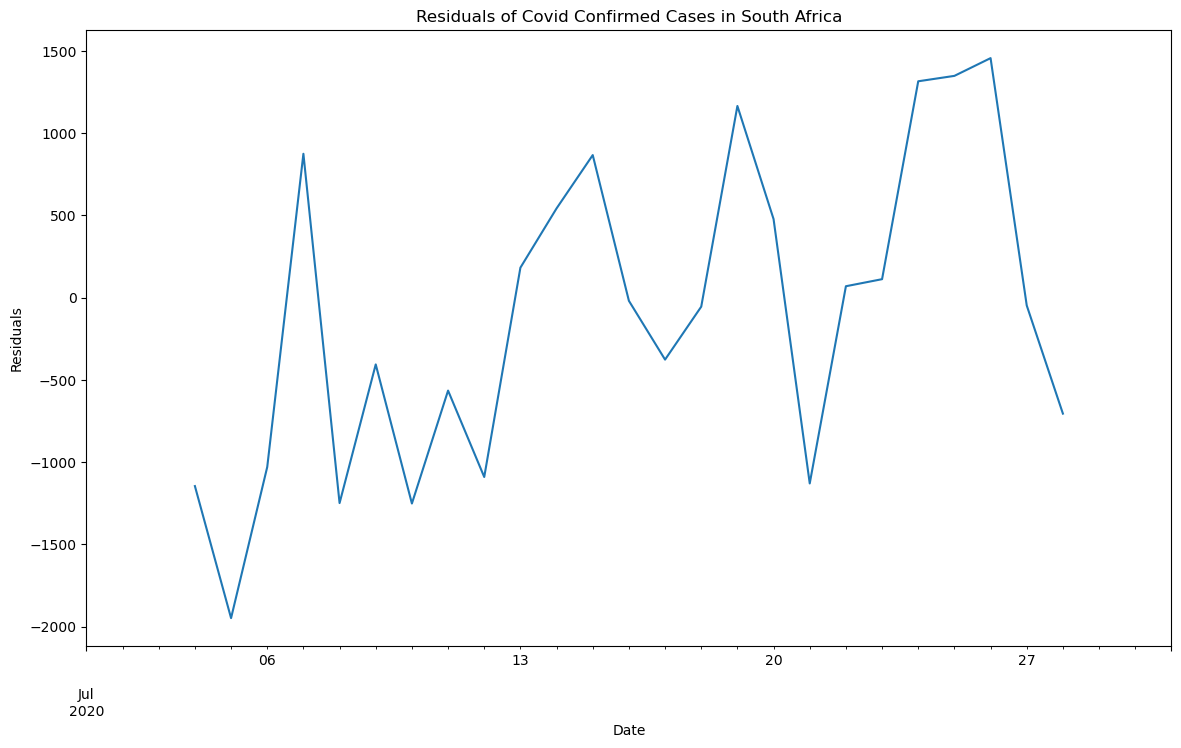

In [106]:
decomposition.resid.plot(title="Residuals of Covid Confirmed Cases in South Africa", figsize=(14, 8))
plt.ylabel("Residuals")
plt.show()


Though there the trend is growing linearly and there is seasonality in the data ,we can see there is still some number of cases in the data which are explained by them so this maybe outliers

**Stationarity**

**Test for Stationarity**
- **Null Hypothesis (H₀)**: The time series is non-stationary .
- **Alternative Hypothesis (H₁)**: The time series is stationary

**Significant Level**
- α = 0.05 (5%)

In [132]:
results = adfuller(south_africa_data_july['Confirmed_Cases'].dropna())
print('p-value:', results[1])

p-value: 3.845930897045735e-06


The P-value is smaller than 5% which means the data is stationary

**Correlation**

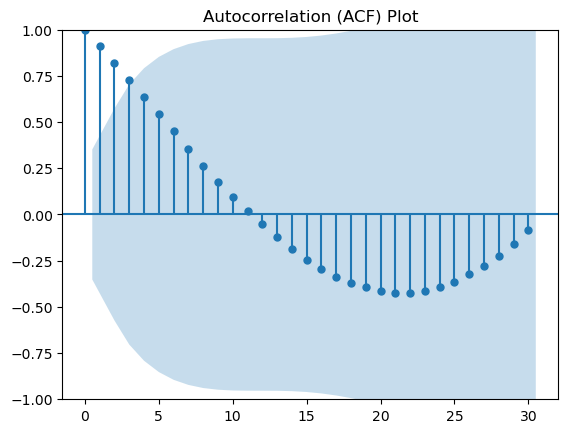

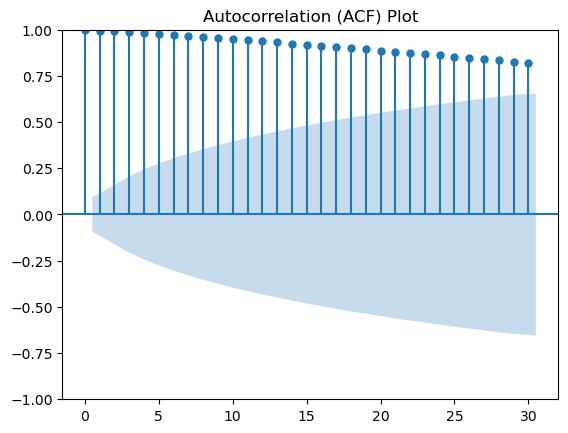

In [133]:
plot_acf(south_africa_data_july, lags=30)
plt.title("Autocorrelation (ACF) Plot")
plt.show()

plot_acf(south_africa_data, lags=30)
plt.title("Autocorrelation (ACF) Plot")
plt.show()

- The strong positive correlation between past and current values suggests that past values have a significant influence on current values.
- Hence we will have to add stationarity to be able to use some models for forecasting

**Rolling Statistics**

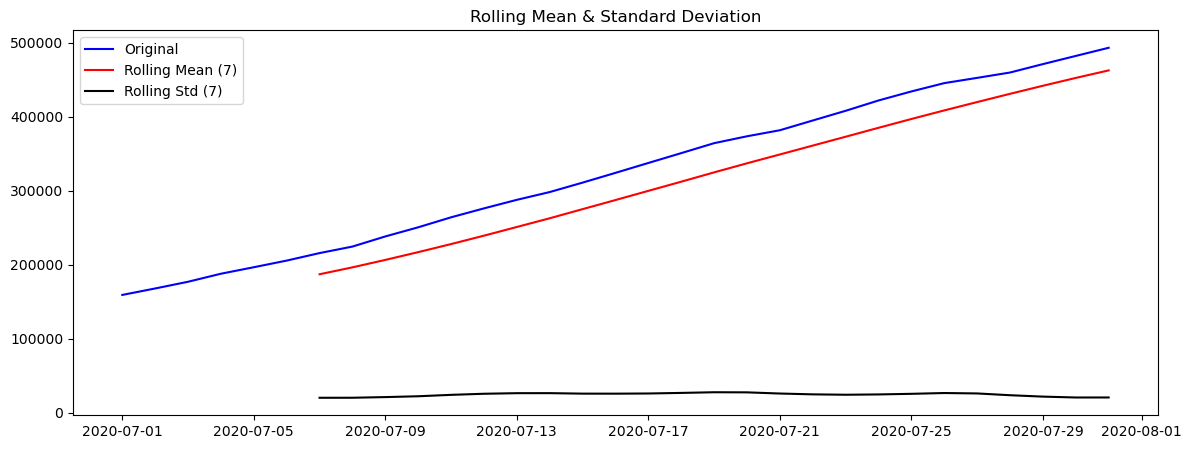

In [134]:
window = 7
rolling_mean = south_africa_data_july.rolling(window=window).mean()
rolling_std = south_africa_data_july.rolling(window=window).std()

plt.figure(figsize=(14,5))
plt.plot(south_africa_data_july, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label=f'Rolling Mean ({window})')
plt.plot(rolling_std, color='black', label=f'Rolling Std ({window})')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


- The rolling mean is very close to the with the standard deviation being very close to zero

#### Feature Engineering 

- We will be using the log as it add stationarity to our data

### **Model Building**

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [135]:
#data splittting
train_size = int(len(south_africa_data_july) * 0.8)
train_data = south_africa_data_july[:train_size]
test_data = south_africa_data_july[train_size:]


**Baseline Model: Linear Regression**

Linear Regression MSE on Training Data: 2745581.27


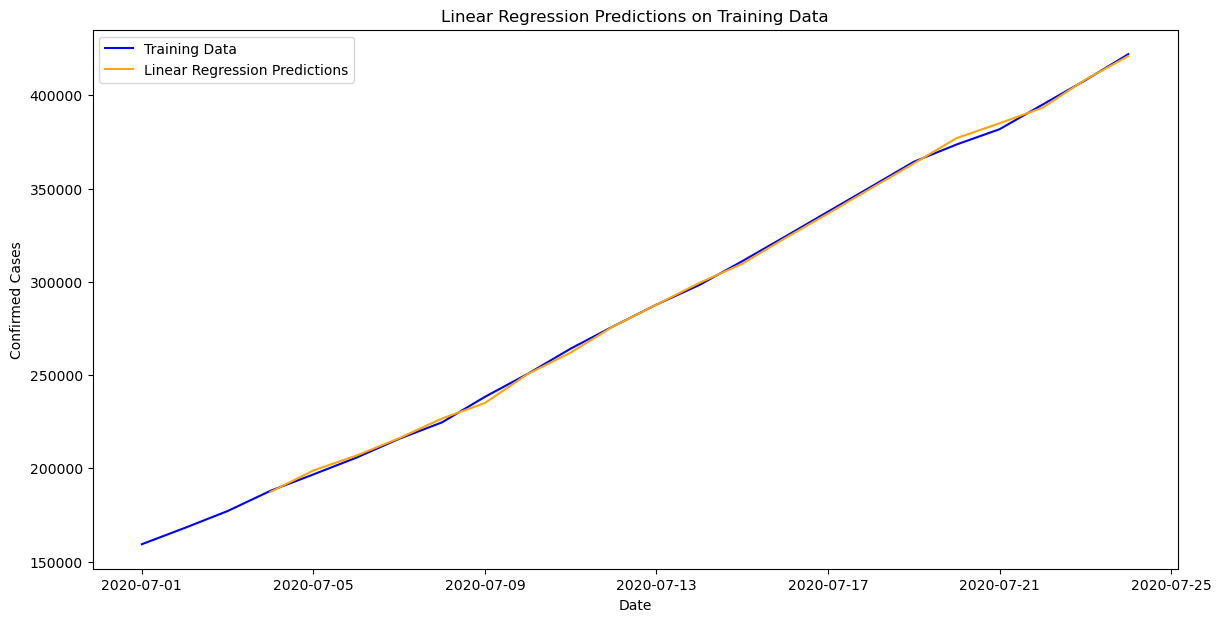

In [136]:
def create_lag_features(series, lags=7):
    df = pd.DataFrame(series)
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df[series.name].shift(lag)
    df = df.dropna()
    return df

lagged_train_data = create_lag_features(train_data['Confirmed_Cases'], lags=3)
X_train = lagged_train_data.drop(columns=['Confirmed_Cases'])
y_train = lagged_train_data['Confirmed_Cases']
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_train = linear_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Linear Regression MSE on Training Data: {mse_train:.2f}")

##plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(lagged_train_data.index, y_pred_train, label='Linear Regression Predictions', color='orange')
plt.title('Linear Regression Predictions on Training Data')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()




**ARIMA MODEL**

In [137]:
stationary_series = south_africa_data_july['Confirmed_Cases'].dropna()

In [138]:
train_size = int(len(stationary_series) * 0.8)
train, test = stationary_series[:train_size], stationary_series[train_size:]

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

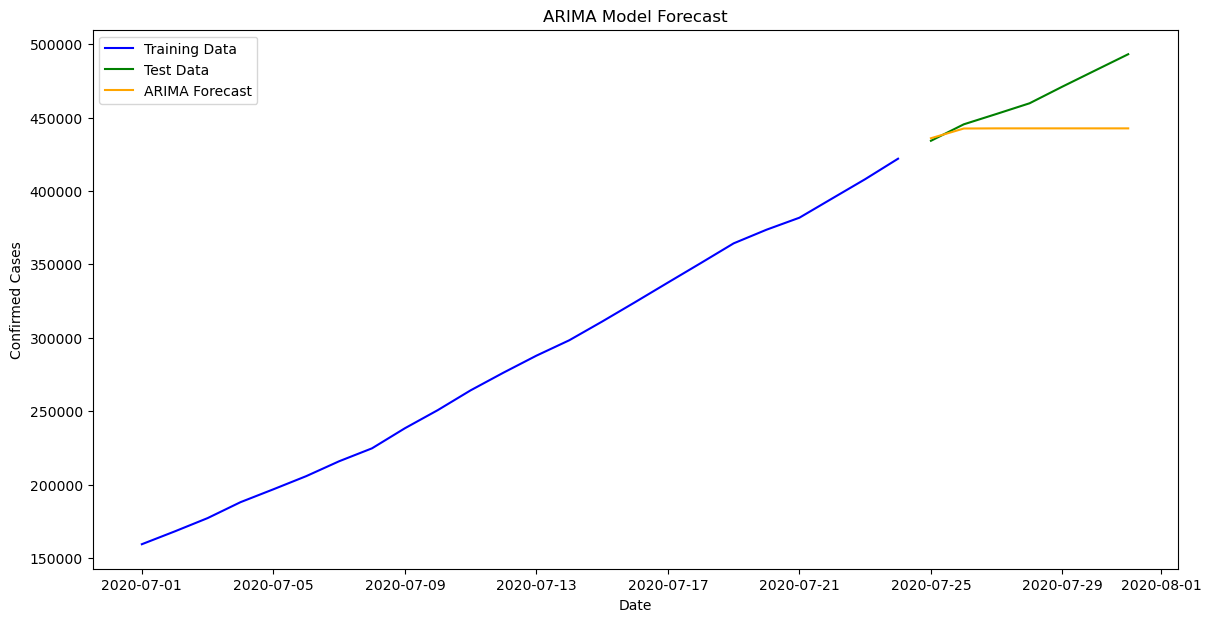

In [140]:

model = ARIMA(train_data, order=(2, 0, 2))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

**SARIMA MODEL**

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


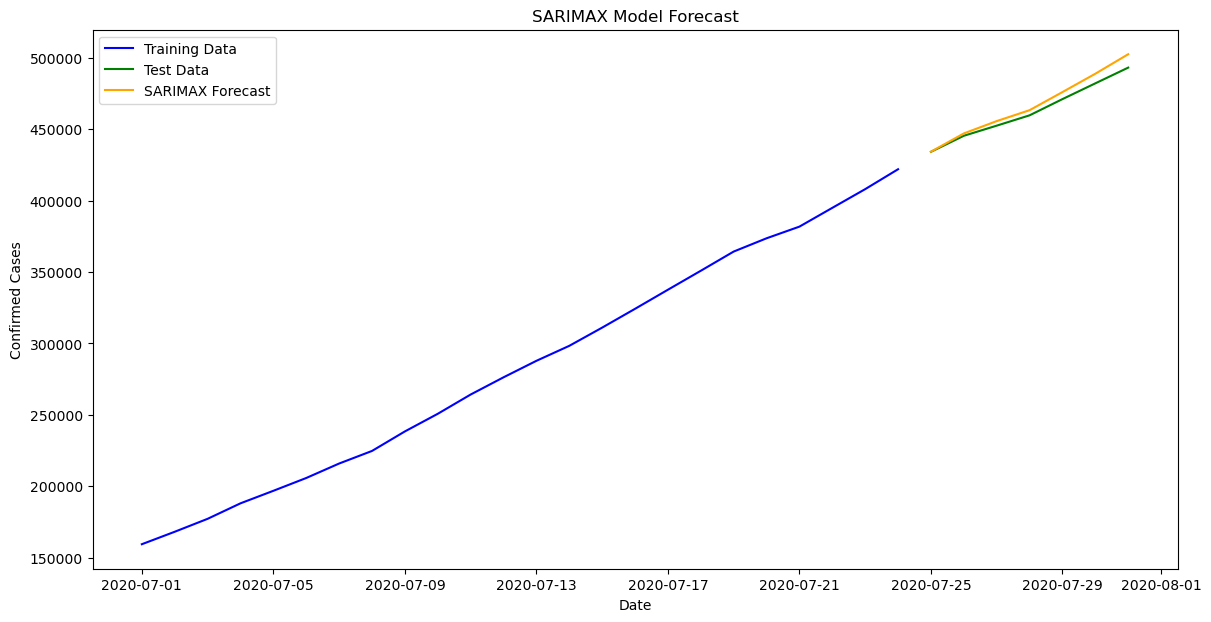

In [141]:
model = SARIMAX(train_data,
                order=(2, 0, 2),          
                seasonal_order=(1, 1, 1, 7), 
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)
forecast = model_fit.forecast(steps=len(test_data))

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='SARIMAX Forecast', color='orange')
plt.title('SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()


**Exponential Smooothing Model**

c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\pales\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing MSE: 20983518.10645056


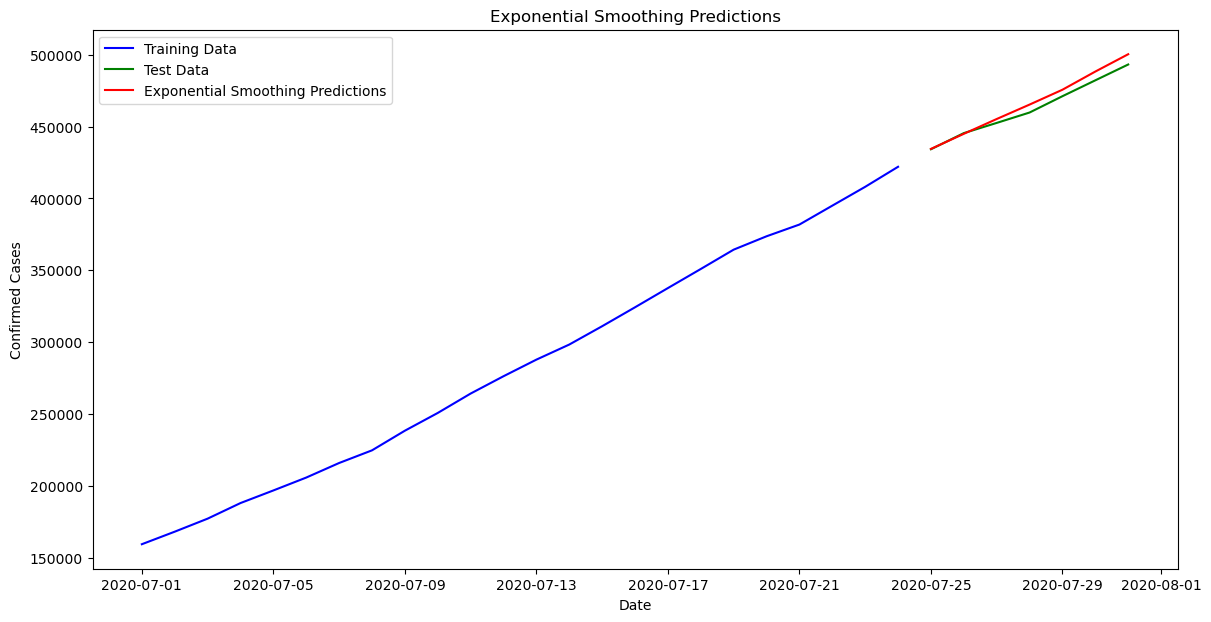

In [142]:
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal="add",seasonal_periods=7)  
hw_fit = hw_model.fit()
hw_pred = hw_fit.forecast(len(test_data))
print("Exponential Smoothing MSE:", mean_squared_error(test_data, hw_pred))

#plot
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Confirmed_Cases'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Confirmed_Cases'], label='Test Data', color='green')
plt.plot(test_data.index, hw_pred, label='Exponential Smoothing Predictions', color='red')
plt.title('Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

### **Evaluation Report**